<a href="https://colab.research.google.com/github/Schiessl/AgoraVAI/blob/main/Importa_S%C3%A9rie_Hist%C3%B3rica_B3_Todas_as_a%C3%A7%C3%B5es_e_op%C3%A7%C3%B5es_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa bibliotecas

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


#Define caminho e carrega arquivo

### Série Histórica diária B3
Arquivo disponível em:
https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

Para inserir o dado mais atual, baixe a série daqui:
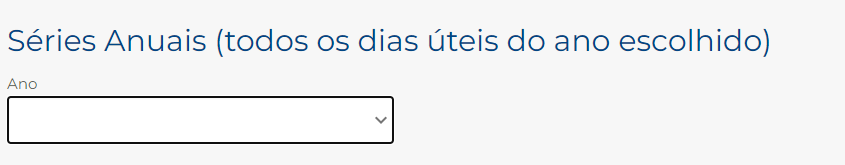
### Layout do arquivo
Arquivo disponível em: https://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf


In [5]:
layout = [
    ("tipo_registro", 2, 'str'),
    ("data_pregao", 8, 'datetime'),
    ("cod_bdi", 2, 'str'),
    ("cod_negociacao", 12, 'str'),
    ("tipo_mercado", 3, 'str'),
    ("nome_empresa", 12, 'str'),
    ("especificacao_papel", 10, 'str'),
    ("prazo_dias_merc_termo", 3, 'str'),
    ("moeda_referencia", 4, 'str'),
    ("preco_abertura", 13, 'float'),
    ("preco_maximo", 13, 'float'),
    ("preco_minimo", 13, 'float'),
    ("preco_medio", 13, 'float'),
    ("preco_ultimo_negocio", 13, 'float'),
    ("preco_melhor_oferta_compra", 13, 'float'),
    ("preco_melhor_oferta_venda", 13, 'float'),
    ("numero_negocios", 5, 'int'),
    ("quantidade_papeis_negociados", 18, 'int'),
    ("volume_total_negociado", 18, 'float'),
    ("preco_exercicio", 13, 'float'),
    ("indicador_correcao_precos", 1, 'str'),
    ("data_vencimento", 8, 'datetime'),
    ("fator_cotacao", 7, 'int'),
    ("preco_exercicio_pontos", 13, 'float'),
    ("codigo_isin", 12, 'str'),
    ("num_distribuicao_papel", 3, 'str')
]


In [6]:
def importar_arquivo_b3(caminho_arquivo, nrows=None):
    """
    Função para importar dados de um arquivo no formato B3 (BM&FBOVESPA) e verificar a consistência.

    Parâmetros:
    - caminho_arquivo (str): O caminho do arquivo a ser importado.
    - nrows (int or None): Número de linhas a serem lidas do arquivo. Se None, lê todas as linhas.

    Retorna:
    - pd.DataFrame: Um DataFrame contendo os dados importados.

    A função lê o arquivo, realiza a importação para um DataFrame e verifica a consistência comparando a quantidade
    de registros importados com a quantidade informada no trailer.
    """
    inicio = datetime.now()
    print('Inicio da leitura:', inicio)

    # Definir os tipos de dados para cada coluna
    dtype_mapping = {
        field[0]: (
            'datetime64[ns]' if field[2] == 'datetime' else
            (float if field[2] == 'float' else
            (int if field[2] == 'int' else 'str'))
        ) for field in layout
    }

    largura_campo = [field[1] for field in layout]

    # Ler o arquivo diretamente com Pandas, lendo apenas as primeiras linhas se nrows for especificado
    df = pd.read_fwf(
        caminho_arquivo,
        widths=largura_campo,
        dtype=dtype_mapping,
        nrows=nrows,  # Número de linhas a serem lidas
        skipheader=1, # pula o header
        skipfooter=1 if nrows is None else 0 # pula o trailer quando lê arquivo completo
    )

    # Renomear as colunas
    df.columns = [field[0] for field in layout]

    # Converter a colunas com datas para datetime64[ns]
    df['data_pregao'] = pd.to_datetime(df['data_pregao'], format='%Y%m%d', errors='coerce')
    df['data_vencimento'] = pd.to_datetime(df['data_vencimento'], format='%Y%m%d', errors='coerce')
    # Arredondar campos para duas casas decimais
    decimal_fields = [field[0] for field in layout if field[2] == 'float']
    df[decimal_fields] = df[decimal_fields] / 100
    # Formatar o campo 'preco_exercicio_pontos' com 6 casas decimais
    df['preco_exercicio_pontos'] = df['preco_exercicio_pontos'] / 1e6
    # Aplicar formatação específica apenas para o campo volume_total_negociado
    df['volume_total_negociado'] = df['volume_total_negociado'].apply(lambda x: '{:.2f}'.format(x))

    # Exibir a quantidade de linhas importadas
    # print('Quantidade de linhas importadas:', len(df))

    if nrows is None:
        # Se lendo todas as linhas, verificar o trailer
        # Exibir a quantidade lida no trailer (posições 32 a 42)
        with open(caminho_arquivo, 'r') as file:
            lines = file.readlines()
            trailer = lines[-1]
            quantidade_lida_no_trailer = int(trailer[32:42])-2  # exclui header e trailer

        if len(df) == quantidade_lida_no_trailer:
            print(f'\n#### Arquivo importado com sucesso! - {len(df):,.0f} registros em {(datetime.now() - inicio)} ####')
        else:
            print(f'\n---- Arquivo não foi importado corretamente! ----')
            print(f'---- Foram importadas {len(df):,.0f} linhas, mas o trailer indica {quantidade_lida_no_trailer} linhas. ----')
    else:
            print(f'\n---- Foram importadas {len(df):,.0f} linhas. ----')

    print('\nFim da leitura:', datetime.now())
    return df

# Exemplo de uso da função, lendo apenas as primeiras 10 linhas
caminho_do_arquivo = '/content/COTAHIST_A2024.TXT'
# df = importar_arquivo_b3(caminho_do_arquivo, nrows=3)
df = importar_arquivo_b3(caminho_do_arquivo,)


Inicio da leitura: 2024-02-08 13:03:57.199351


ValueError: invalid literal for int() with base 10: 'SA     ON '

In [ ]:
df.dtypes


In [ ]:
df

# Tipos de Mercado

*   **010** VISTA
*   **012** EXERCÍCIO DE OPÇÕES DE COMPRA,
*   **013** EXERCÍCIO DE OPÇÕES DE VENDA,
*   **017** LEILÃO,
*   **020** FRACIONÁRIO,
*   **030** TERMO,
*   **050** FUTURO COM RETENÇÃO DE GANHO,
*   **060** FUTURO COM MOVIMENTAÇÃO CONTÍNUA,
*   **070** OPÇÕES DE COMPRA,
*   **080** OPÇÕES DE VENDA


In [ ]:
def filtrar_tipo_mercado(df):
    """
    Função para filtrar um DataFrame com base no tipo de mercado.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame contendo os dados a serem filtrados.

    Retorna:
    - pd.DataFrame: Um DataFrame contendo apenas os registros do tipo mercado à vista.
    - pd.DataFrame: Um DataFrame contendo apenas os registros do tipo opções.
    """
    # Filtrar mercado à vista (tipo_mercado = 10)
    mercado_a_vista_df = df[df['tipo_mercado'] == 10]

    # Filtrar opções (tipo_mercado igual a 70 ou 80)
    opcoes_df = df[df['tipo_mercado'].isin([70, 80])]

    return mercado_a_vista_df, opcoes_df

# Aplicar a função de filtragem
mercado_a_vista, opcoes = filtrar_tipo_mercado(df)


#Mercado a vista - Ações

In [ ]:
mercado_a_vista

In [ ]:
mercado_a_vista_filtro = mercado_a_vista.loc[:, ['data_pregao', 'cod_negociacao', 'especificacao_papel', 'preco_ultimo_negocio', 'volume_total_negociado']]
mercado_a_vista_filtro = mercado_a_vista_filtro.set_index('data_pregao')
mercado_a_vista_filtro


In [ ]:
def plotar_grafico(df, codigo_negociacao, incluir_tendencia=False):
    # Tratar o código de negociação para maiúsculas
    codigo_negociacao = codigo_negociacao.upper()

    # Filtrar o DataFrame pelo código de negociação
    df_codigo = df[df['cod_negociacao'] == codigo_negociacao]

    # Configurar o estilo do seaborn para melhorar a aparência do gráfico
    sns.set(style="whitegrid")
    # Criar o gráfico
    plt.figure(figsize=(12, 5))
    # Adicionar o gráfico de linhas
    sns.lineplot(x=df_codigo.index, y='preco_ultimo_negocio', data=df_codigo, label='Preço Último Negócio')

    # Adicionar rótulos e título
    plt.title(f'Preço Último Negócio - {codigo_negociacao}')
    plt.xlabel('')
    plt.ylabel('Preço Último Negócio')

    # Adicionar marcadores para ponto de máximo e mínimo
    max_index = df_codigo['preco_ultimo_negocio'].idxmax(); min_index = df_codigo['preco_ultimo_negocio'].idxmin()
    max_value = df_codigo.loc[max_index, 'preco_ultimo_negocio']; min_value = df_codigo.loc[min_index, 'preco_ultimo_negocio']

    plt.scatter(max_index, max_value, color='green', marker='o', label=f'Máximo: {max_value:.2f}')
    plt.scatter(min_index, min_value, color='red', marker='o', label=f'Mínimo: {min_value:.2f}')
    # Adicionar anotações de texto
    plt.annotate(f'{max_value:.2f}', (max_index, max_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')
    plt.annotate(f'{min_value:.2f}', (min_index, min_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')

    plt.legend()
    plt.xticks(rotation=35, fontsize=9)
    # Exibir o gráfico
    plt.show()

# Exemplo de uso
plotar_grafico(mercado_a_vista_filtro, 'petr4', incluir_tendencia=True)


#Mercado de Opções

In [ ]:
opcoes

In [ ]:
op_filtro = opcoes.loc[:, ['data_pregao', 'cod_negociacao', 'preco_ultimo_negocio', 'preco_exercicio', 'data_vencimento']]
op_filtro = op_filtro.set_index('data_pregao')
op_filtro


##Visualizar opções de ativo específico

In [ ]:
def filtrar_registros_prefixo(df, coluna, prefixo):
    """
    Filtra os registros do DataFrame onde a coluna especificada começa com o prefixo fornecido.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame a ser filtrado.
    - coluna (str): O nome da coluna para aplicar o filtro.
    - prefixo (str): O prefixo desejado.

    Retorna:
    - pd.DataFrame: Um novo DataFrame contendo apenas os registros que atendem ao critério.
    """
    return df[df[coluna].str.lower().str.startswith(prefixo.lower())]

# Exemplo de uso
opcoes_df = filtrar_registros_prefixo(op_filtro, 'cod_negociacao', 'petr')
opcoes_df

In [ ]:
def plotar_grafico_multi_ativos(df, codigos_negociacao, incluir_tendencia=False):
    # Tratar os códigos de negociação para maiúsculas
    codigos_negociacao = [codigo.upper() for codigo in codigos_negociacao]
    # Filtrar o DataFrame pelos códigos de negociação
    df_codigos = df[df['cod_negociacao'].isin(codigos_negociacao)]

    # Configurar o estilo do seaborn para melhorar a aparência do gráfico
    sns.set(style="whitegrid")
    # Criar o gráfico
    plt.figure(figsize=(12, 5))

    # Adicionar os gráficos de linhas para cada ativo
    for codigo in codigos_negociacao:
        df_codigo = df_codigos[df_codigos['cod_negociacao'] == codigo]
        sns.lineplot(x=df_codigo.index, y='preco_ultimo_negocio', data=df_codigo, label=f'Preço {codigo}')

    # Adicionar rótulos e título
    plt.title(f'Preço Último Negócio - {codigos_negociacao}')
    plt.xlabel('')
    plt.ylabel('Preço Último Negócio')

    # Adicionar marcadores para ponto de máximo e mínimo para cada ativo
    for codigo in codigos_negociacao:
        df_codigo = df_codigos[df_codigos['cod_negociacao'] == codigo]
        max_index = df_codigo['preco_ultimo_negocio'].idxmax()
        min_index = df_codigo['preco_ultimo_negocio'].idxmin()

        max_value = df_codigo.loc[max_index, 'preco_ultimo_negocio']
        min_value = df_codigo.loc[min_index, 'preco_ultimo_negocio']

        plt.scatter(max_index, max_value, marker='o', label=f'Máximo {codigo}: {max_value:.2f}')
        plt.scatter(min_index, min_value, marker='o', label=f'Mínimo {codigo}: {min_value:.2f}')
        # Adicionar anotações de texto
        plt.annotate(f'{max_value:.2f}', (max_index, max_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')
        plt.annotate(f'{min_value:.2f}', (min_index, min_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black', weight='bold')

    # plt.legend()
    plt.xticks(rotation=35, fontsize=9)
    # Exibir o gráfico
    plt.show()

# Exemplo de uso com até 4 ativos
# plotar_grafico_multi_ativos(opcoes, ['PETRX299', 'PETRX45', 'PETRX450', 'PETRX560'], incluir_tendencia=True)
plotar_grafico_multi_ativos(opcoes, ['PETRX45', 'PETRX560'], incluir_tendencia=True)
